Copyright **`(c)`** 2024 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

# Set Cover problem

See: https://en.wikipedia.org/wiki/Set_cover_problem

In [92]:
from random import random, seed
from itertools import product
import numpy as np
from tqdm.auto import tqdm
from matplotlib import pyplot as plt
from itertools import accumulate

from icecream import ic

## Reproducible Initialization

If you want to get reproducible results, use `rng` (and restart the kernel); for non-reproducible ones, use `np.random`.

In [93]:
UNIVERSE_SIZE = 100_000
NUM_SETS = 10_000
DENSITY = 0.3

MAX_STEPS=1_000
rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

## Helper Functions

In [94]:
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    return np.all(np.logical_or.reduce(SETS[solution]))
    #phenotype = np.logical_or.reduce(SETS[solution])     # at least each element covered by a set
    #return np.all(phenotype)


def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()

def fitness(solution):
    return (valid(solution), -cost(solution))

def tweak(solution):
    #add/remove a random set
    new_solution = solution.copy()
    index = rng.integers(0,NUM_SETS)
    new_solution[index] = not new_solution[index]
    return new_solution

#more powerful tweaks
#Multiple mutation
def tweak2(solution):
    new_solution = solution.copy()
    index = None
    while index is None or np.random.random() < 0.4:   #40% probability to do a mutation
        index = np.random.randint(0, NUM_SETS)
        new_solution[index] = not new_solution[index]
    return new_solution

#better multiple mutation
def tweak3(solution):
    new_solution = solution.copy()
    mask = rng.random(NUM_SETS) < 0.01
    new_solution = np.logical_xor(mask, new_solution)
    return new_solution


## Have Fun!

In [95]:
# A dumb solution of "all" sets
solution = np.full(NUM_SETS, True)
valid(solution), cost(solution)

(np.True_, np.float64(841161499.8567094))

In [96]:
# A random solution with random 50% of the sets
solution = rng.random(NUM_SETS) < .5
valid(solution), cost(solution)

(np.True_, np.float64(423529732.0184426))

## RM HILL CLIMBER

100%|██████████| 1000/1000 [15:57<00:00,  1.04it/s]


Universe Size: 100000 Num sets: 10000 density: 0.3
solution: True   Cost: -761268274.651793


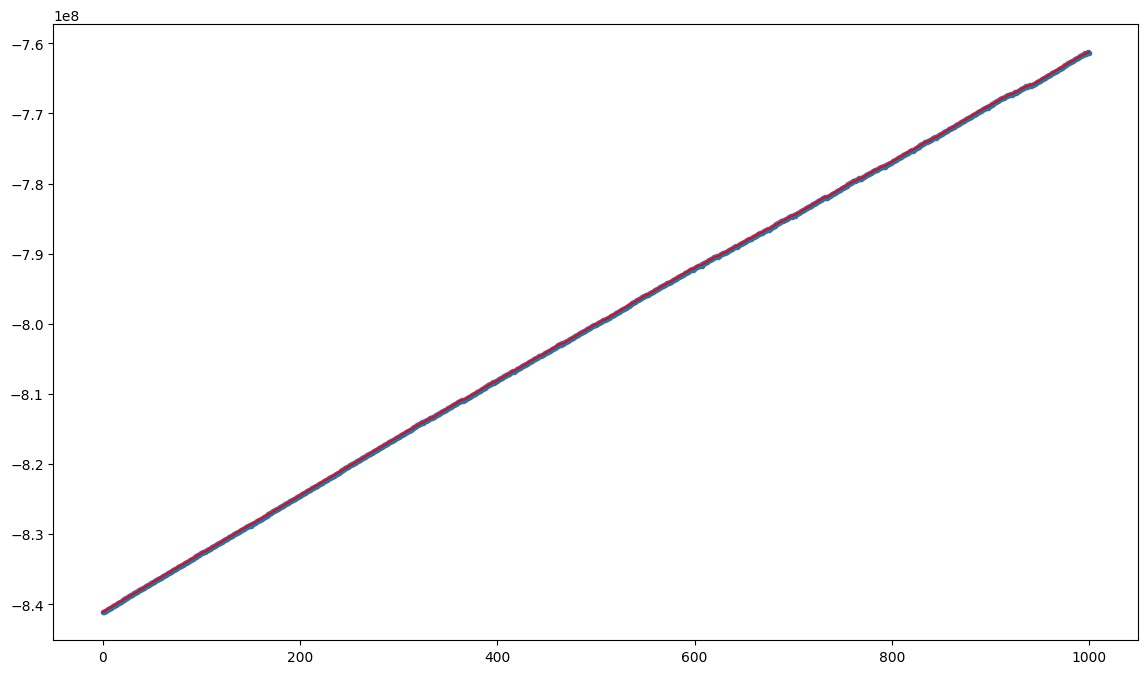

In [97]:
#generate first solution
solution = np.full(NUM_SETS, True)
#print("iniziale:")
#ic(solution)
#ic(fitness(solution))
history = []

#RM Hill Climber
history.append(fitness(solution))
for n in tqdm(range(MAX_STEPS)):
              
    # TWEAK!
    new_solution = tweak(solution)

    history.append(fitness(new_solution))
    if fitness(new_solution) > fitness(solution):
        solution = new_solution
        
# That's all...
#ic(fitness(solution))
#ic(history.index(fitness(solution)))
print("Universe Size:", UNIVERSE_SIZE, "Num sets:", NUM_SETS, "density:", DENSITY)
print("solution:", fitness(solution)[0], "  Cost:", fitness(solution)[1])

plotHistory = list(map(lambda x: x[1], history))

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(plotHistory, max)),
    color="red",
)

_ = plt.scatter(range(len(history)), plotHistory, marker=".")
#_ = plt.scatter(range(len(history)), history, marker=".")


## Multiple Random Mutation

100%|██████████| 1000/1000 [13:43<00:00,  1.21it/s]


Universe Size: 100000 Num sets: 10000 density: 0.3
solution: True   Cost: -719707053.9104798


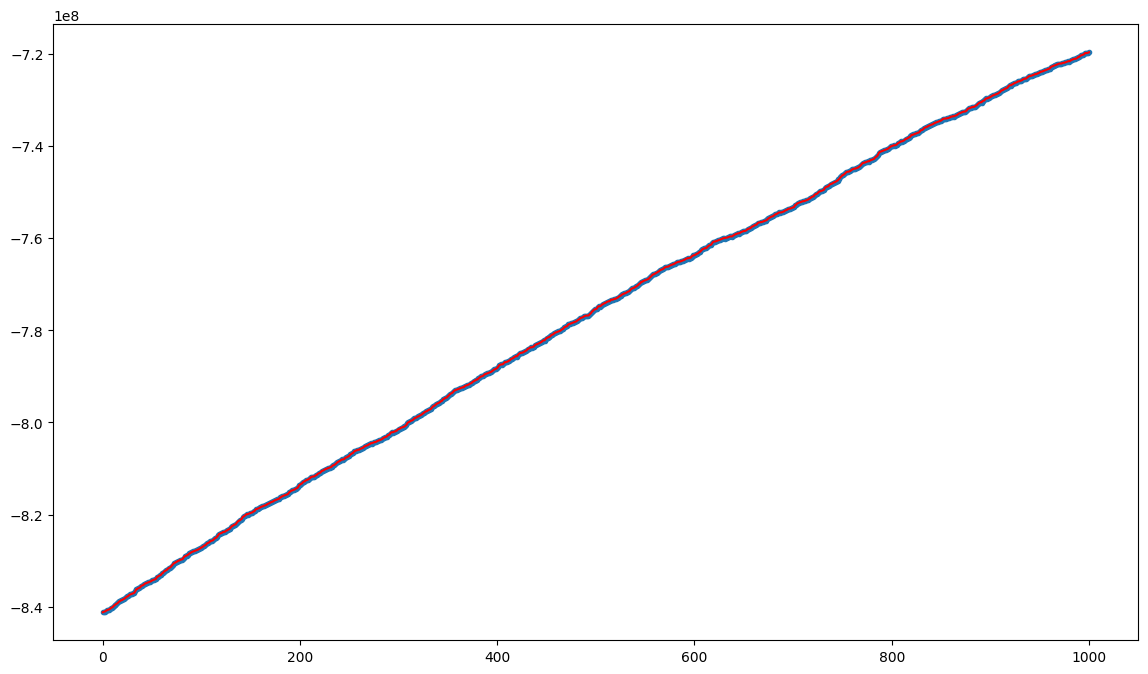

In [98]:

solution = np.full(NUM_SETS, True)
#print("iniziale:")
#ic(solution)
#ic(fitness(solution))
history = []

#RM Hill Climber
history.append(fitness(solution))
for n in tqdm(range(MAX_STEPS)):
              
    new_solution = tweak2(solution)
   
    history.append(fitness(new_solution))
    if fitness(new_solution) > fitness(solution):
        solution = new_solution
        
# That's all...
#ic(fitness(solution))
#ic(history.index(fitness(solution)))
print("Universe Size:", UNIVERSE_SIZE, "Num sets:", NUM_SETS, "density:", DENSITY)
print("solution:", fitness(solution)[0], "  Cost:", fitness(solution)[1])

plotHistory = list(map(lambda x: x[1], history))

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(plotHistory, max)),
    color="red",
)

_ = plt.scatter(range(len(history)), plotHistory, marker=".")

## Multiple RM with better tweak

100%|██████████| 1000/1000 [07:09<00:00,  2.33it/s]


Universe Size: 100000 Num sets: 10000 density: 0.3
solution: True   Cost: -354477497.26474905


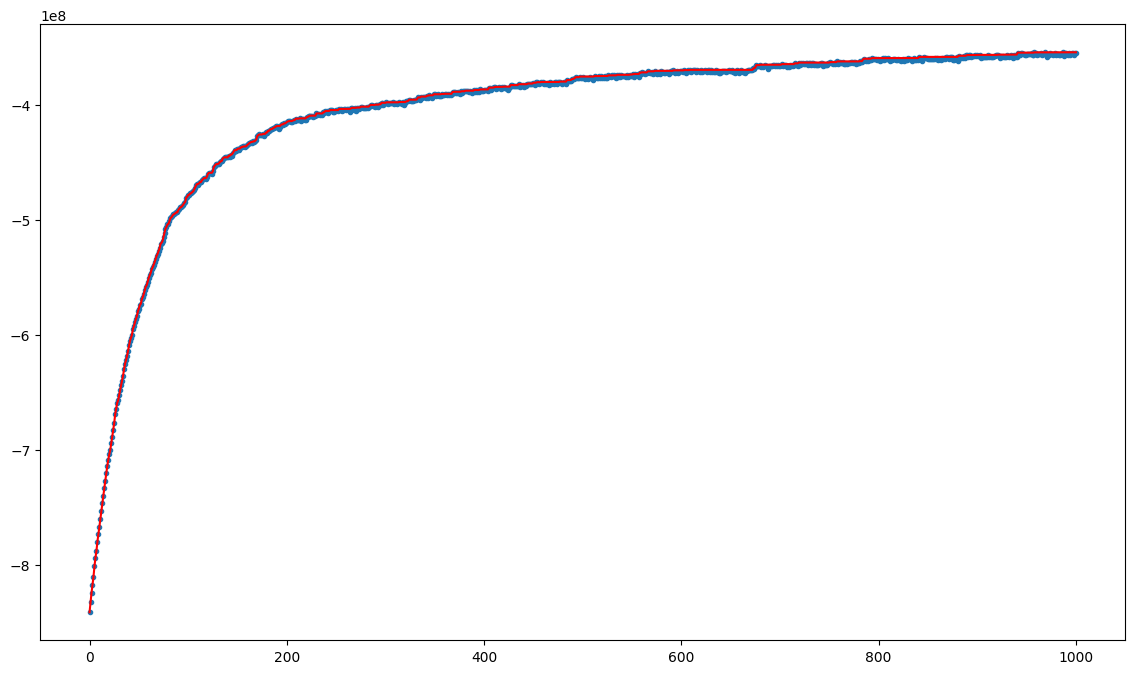

In [99]:
solution = np.full(NUM_SETS, True)
#print("iniziale:")
#ic(solution)
#ic(fitness(solution))
history = []

#RM Hill Climber
history.append(fitness(solution))
for n in tqdm(range(MAX_STEPS)):
              
    new_solution = tweak3(solution)
   
    history.append(fitness(new_solution))
    if fitness(new_solution) > fitness(solution):
        solution = new_solution
        
# That's all...
#ic(fitness(solution))
#ic(history.index(fitness(solution)))
print("Universe Size:", UNIVERSE_SIZE, "Num sets:", NUM_SETS, "density:", DENSITY)
print("solution:", fitness(solution)[0], "  Cost:", fitness(solution)[1])

plotHistory = list(map(lambda x: x[1], history))

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(plotHistory, max)),
    color="red",
)

_ = plt.scatter(range(len(history)), plotHistory, marker=".")

## STEEPEST STEP AND RESTART

step 1: 100%|██████████| 66/66 [01:55<00:00,  1.76s/it]
ic| fitness(solution): (np.True_, np.float64(-823994717.9593042))
step 2: 100%|██████████| 66/66 [01:55<00:00,  1.75s/it]
ic| fitness(solution): (np.True_, np.float64(-823730391.5482059))
step 3: 100%|██████████| 66/66 [01:55<00:00,  1.75s/it]
ic| fitness(solution): (np.True_, np.float64(-825514031.0227586))
100%|██████████| 3/3 [05:50<00:00, 116.74s/it]


Universe Size: 100000 Num sets: 10000 density: 0.3
solution: True   Cost: -825514031.0227586


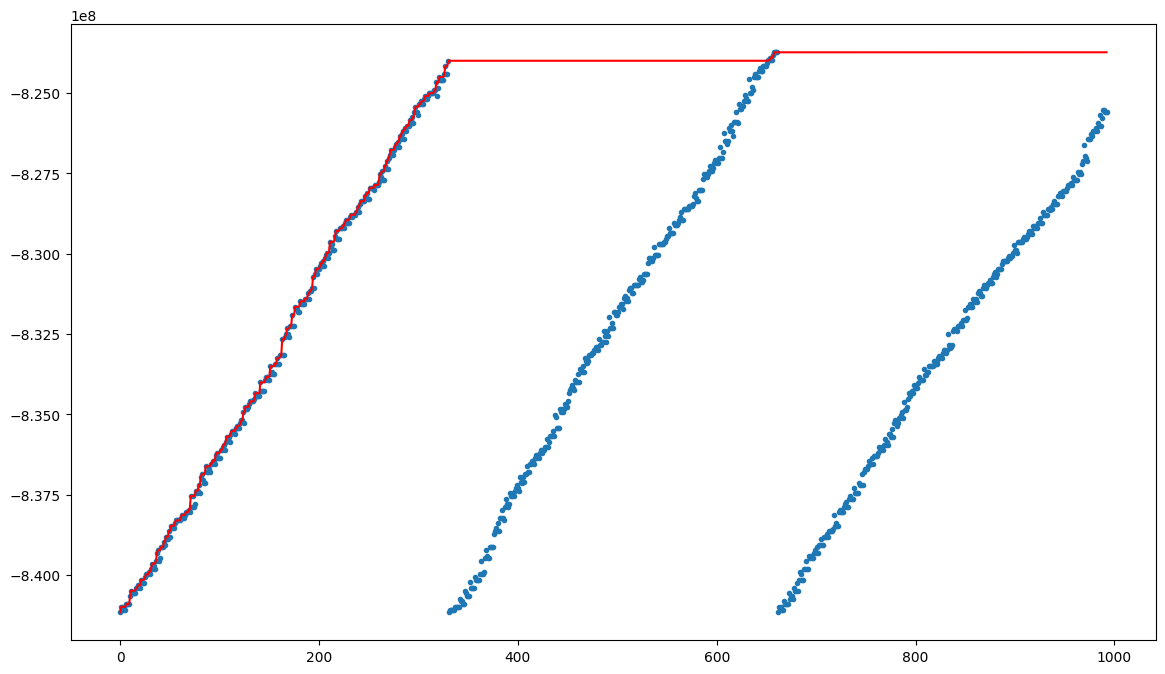

In [100]:
NUM_RESTARTS = 3
STEEPEST_STEP_CANDIDATES = 5
TRUE_MAX_STEPS = MAX_STEPS // STEEPEST_STEP_CANDIDATES

max_value = (False, float('-inf'))  
num_steps = 0
history = list()

for i in tqdm(range(NUM_RESTARTS), position=0):
    solution = np.full(NUM_SETS, True)  # restarts the solution
    history.append(fitness(solution))

    last_improvement = (0, 0)
    new_solution = solution

    for n in tqdm(range(TRUE_MAX_STEPS // NUM_RESTARTS), position=1, desc=f'step {i+1}'):
        # create candidate solutions and evaluate them
        candidates = [tweak2(solution) for i in range(STEEPEST_STEP_CANDIDATES)]  #tweak multiple mutations
        candidates_fitness = list()
        for c in candidates:
            f = fitness(c)
            history.append(f)
            candidates_fitness.append(f)
        idx = candidates_fitness.index(max(candidates_fitness))

        # keep candidate solution that yielded the steepest ascent
        new_solution = candidates[idx]
        new_fitness = candidates_fitness[idx]
        num_steps += STEEPEST_STEP_CANDIDATES

        if new_fitness > fitness(solution):
            # logging.info(f"Whoa! After {n:,} found value={value(new_solution):,}")
            solution = new_solution

    ic(fitness(solution))

    if fitness(solution) > max_value:
        max_value = fitness(solution)
        best_solution = solution

# That's all...
#ic(fitness(solution))
#ic(history.index(fitness(solution)))
print("Universe Size:", UNIVERSE_SIZE, "Num sets:", NUM_SETS, "density:", DENSITY)
print("solution:", fitness(solution)[0], "  Cost:", fitness(solution)[1])

plotHistory = list(map(lambda x: x[1], history))
plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(plotHistory, max)),
    color="red",
)

_ = plt.scatter(range(len(history)), plotHistory, marker=".")